Example using sigfeat framework
===============================

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First we need a test signal:

In [2]:
numsamples = 10 * 1024
samplerate = 16000

t = linspace(0, numsamples/samplerate, numsamples)
x = (1 + sin(2*pi*10*t) + sin(2*pi*14*t)) * randn(numsamples)

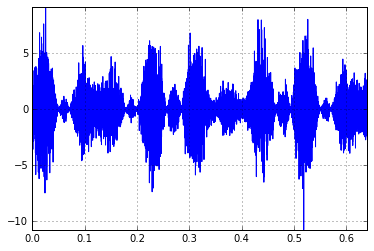

In [3]:
plot(t, x)
grid(True)
axis('tight');

Import Sigfeat stuff
--------------------

In [4]:
from sigfeat.source import ArraySource
from sigfeat.sink import DefaultDictSink
from sigfeat.feature import Feature, FeatureSet, hide
from sigfeat.extractor import Extractor

1. Define Features
------------------

In [5]:
class BlockPosition(Feature):
    def process(self, **bd):
        return bd['index'] + int(0.5 * bd['source'].blocksize)


class RMS(Feature):
    # Square and Mean could be own features and requirements of this feature
    def process(self, block, **data):
        return np.sqrt(np.mean(block**2, axis=0))  


class Abs(Feature):
    def process(self, block, **data):
        return np.abs(block)


class AbsMax(Feature):
    def requires(self):
        return [hide(Abs())]  # The feature Abs is hidden and will not be written into Sink.

    def process(self, block, **data):
        return np.max(data['results']['Abs'], axis=0)
    

2. Create a Set of Features you want to extract
-----------------------------------------------

In [6]:
fset = FeatureSet(
    BlockPosition(name='index'),
    RMS(name='rms'),
    AbsMax(name='absmax')
    )

3. Build a feature extractor instance
-------------------------------------

In [7]:
fe = Extractor(featureset=fset)

4. Define a sink and a source instance
--------------------------------------

In [8]:
sink = DefaultDictSink()
source = ArraySource(x, name='testsig', samplerate=samplerate, blocksize=512, overlap=256)

5. Extract the features
-----------------------

In [9]:
res = fe.extract(source, sink)

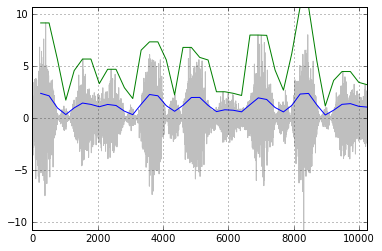

In [10]:
plot(x, color='grey', alpha=0.5)
plot(res['index'], res['rms'])
plot(res['index'], res['absmax'])
axis('tight')
grid(True)

In [11]:
import json

In [13]:
print(json.dumps(sink, indent=2, default=str, sort_keys=True))

{
  "absmax": [
    9.172215886351264,
    9.172215886351264,
    5.6621409574757635,
    1.7387987776864615,
    4.581164331429282,
    5.695794712166501,
    5.695794712166501,
    3.326903980520358,
    4.710476094599585,
    4.710476094599585,
    2.9368201730377317,
    1.8911803348394016,
    6.549598843481546,
    7.349625338974506,
    7.349625338974506,
    5.624728415646231,
    2.2445952863759753,
    6.8155456083900905,
    6.8155456083900905,
    5.853595543552875,
    5.602983727825991,
    2.545461201658023,
    2.545461201658023,
    2.3978128979678086,
    2.1867971042299077,
    8.00543395204094,
    8.00543395204094,
    7.978011629596164,
    4.63726446920205,
    2.696787091181048,
    6.231354739478538,
    10.744204117138693,
    10.744204117138693,
    5.490236539052896,
    1.1737643616710018,
    3.6342578064493787,
    4.492485959896646,
    4.492485959896646,
    3.452195893047934,
    3.223220138250903
  ],
  "features": {
    "absmax": {
      "metadata": 